Notebook for Testing already built Models

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

2023-05-02 15:55:37.021552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
path = "G:/Python/data/10_animals"
height = width = 300

data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    image_size = (height, width)
)

classes = data.class_names

Found 32086 files belonging to 10 classes.


In [2]:
classes = ['cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel', 'turtle'] #Get from Notebook

In [3]:
model = tf.keras.models.load_model("/Users/maxi/Library/CloudStorage/OneDrive-Persönlich/Universität/Semester 2/Proseminar KI/animals_10_69_val_accuracy.h5")

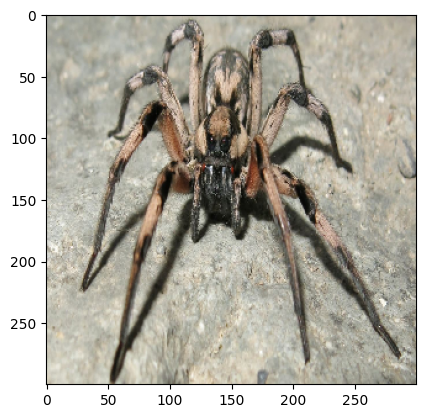

1/1 [==============================] - 0s 60ms/step

Image predicted to be spider with confidence of 99.964%
Image predicted to be squirrel with confidence of 0.023%
Image predicted to be turtle with confidence of 0.006%
Image predicted to be dog with confidence of 0.003%
Image predicted to be cat with confidence of 0.002%


In [8]:
img = tf.keras.preprocessing.image.load_img("/Users/maxi/Library/CloudStorage/OneDrive-Persönlich/Universität/Semester 2/Proseminar KI/Images to test/spider1.jpeg", target_size=(300,300))

plt.imshow(img)
plt.show()

img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)

print()

prediction_probabilities = tf.math.top_k(prediction, k=5)
top_5_scores = prediction_probabilities.values.numpy().tolist()
dict_class_entries = prediction_probabilities.indices.numpy().tolist()
for label, confidence in zip(dict_class_entries[0], top_5_scores[0]):
    print(f"Image predicted to be {classes[label]} with confidence of {round(confidence*100, 3)}%")